In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
path = os.getcwd()
df = pd.read_csv(path+'/Data/df_waittime.csv')

#### 1. Show statistical differences between 1, 2, 4 and 8 servers
With $\mu = 1$, $\rho = 0.7$ and therefore $\lambda = [0.7,\ 1.4,\ 2.1,\ 2.8]$ respectively.

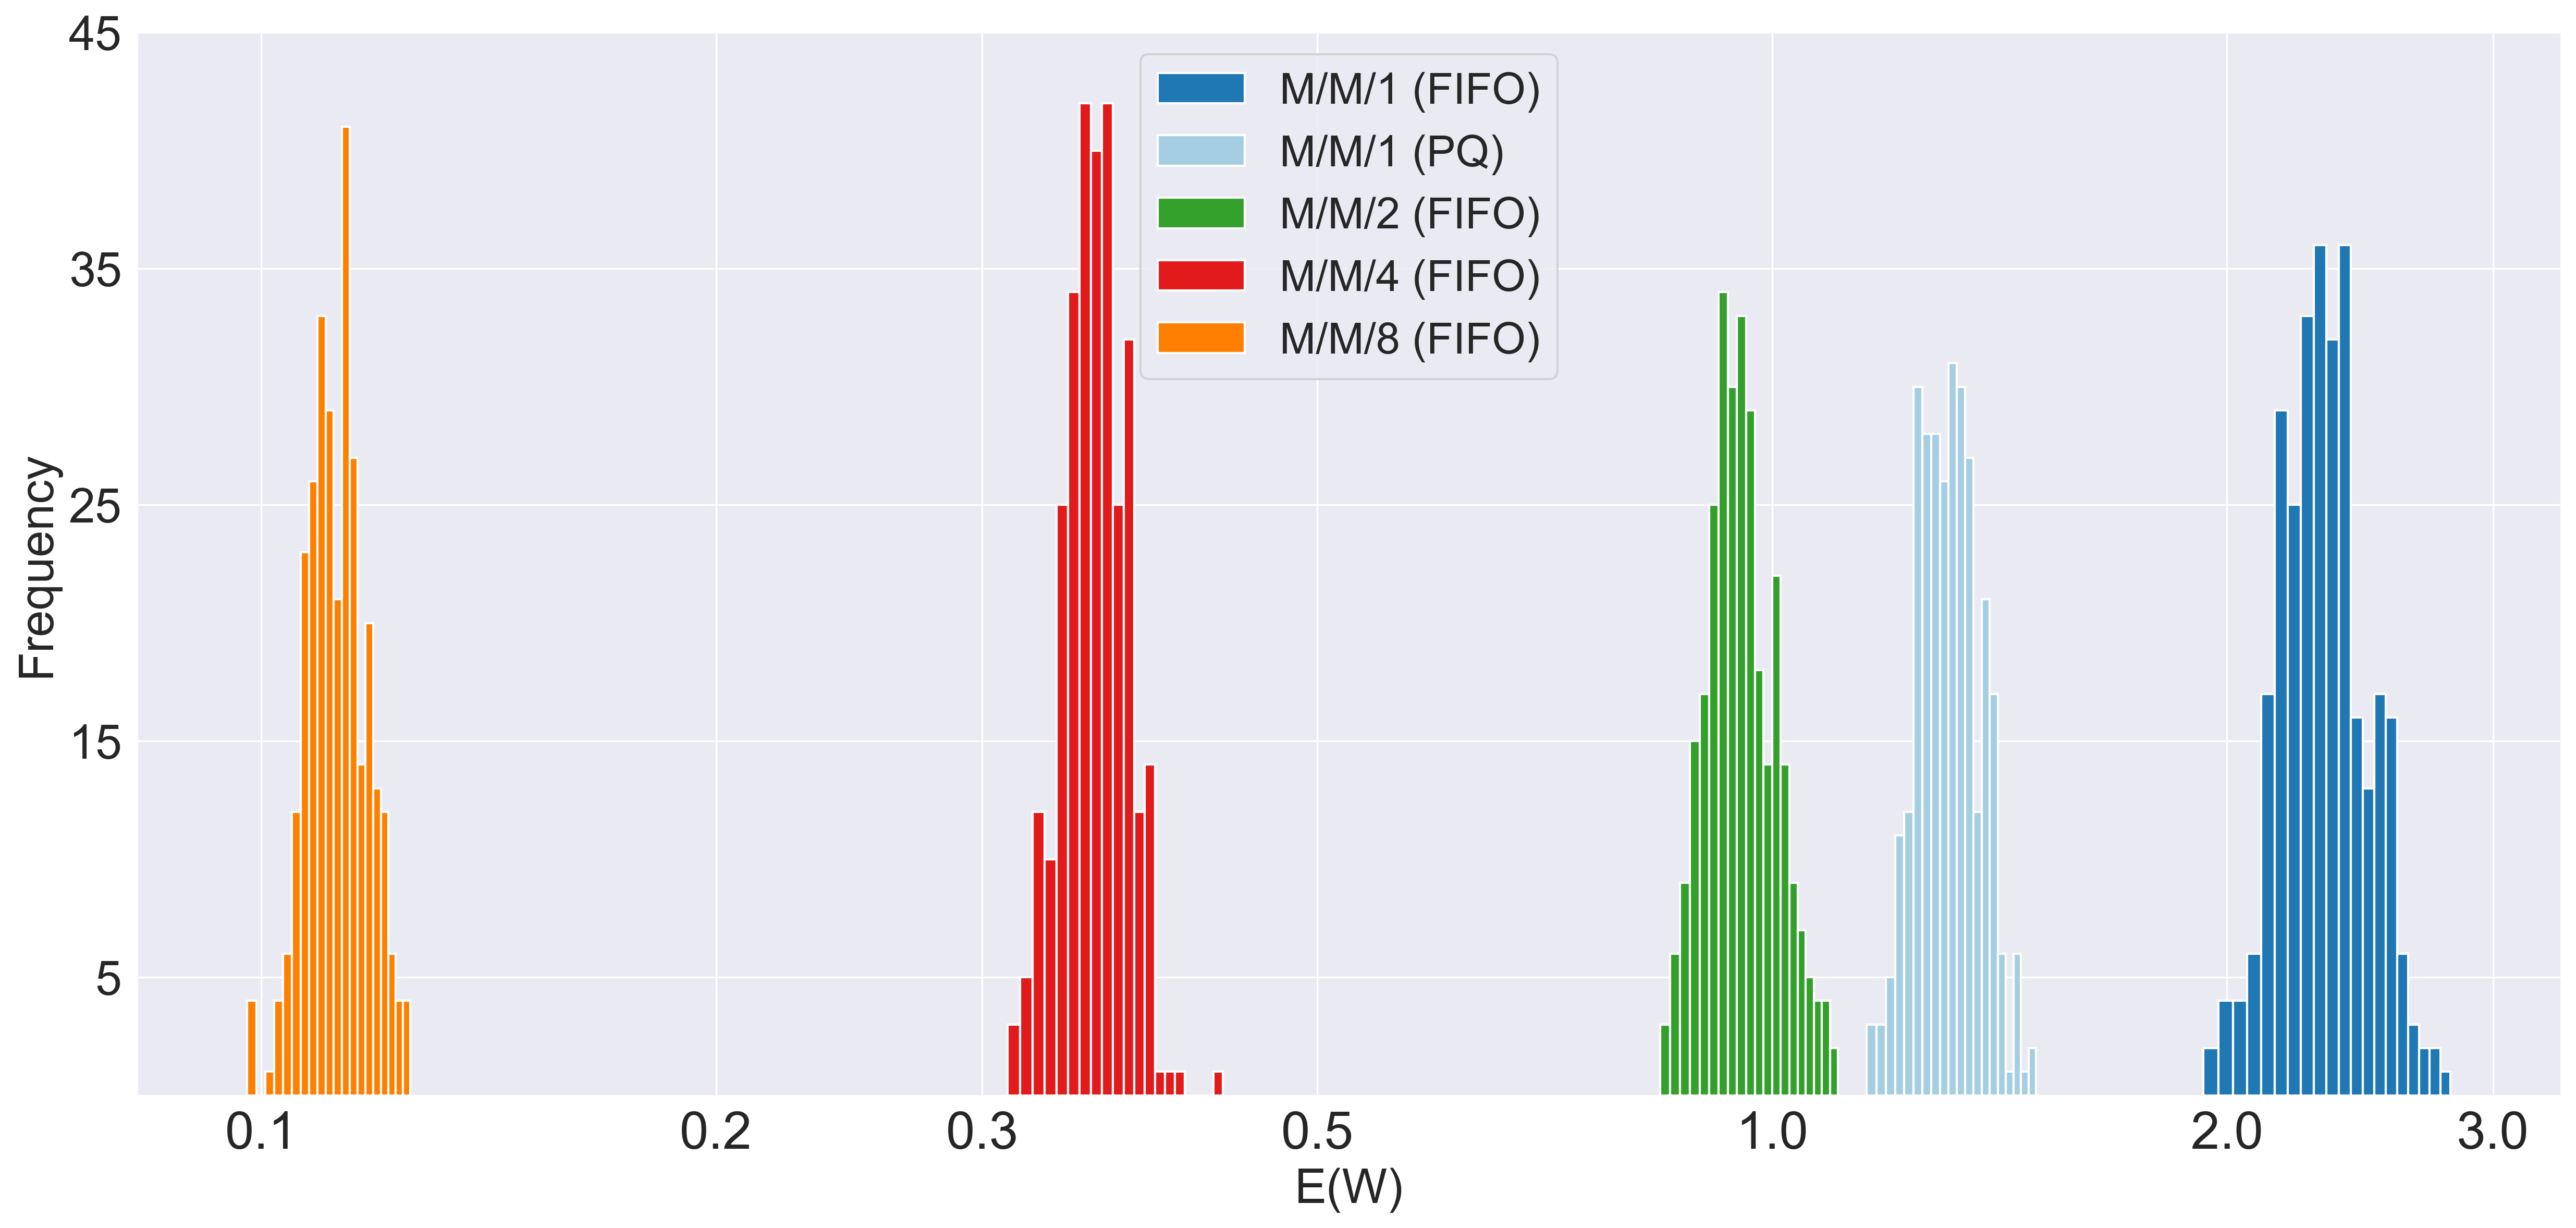

In [10]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(1, figsize=(20,9),dpi=300)
palette = sns.color_palette("Paired")
# plt.rcParams['xtick.labelsize']= 22
# plt.rcParams['ytick.labelsize']= 22


#Plot histograms
axs.hist(df["('exp', 1, 0.7)"],bins=20,color=palette[1],label='M/M/1 (FIFO)')
axs.hist(df["('priority', 1, 0.7)"],bins=20,color=palette[0],label='M/M/1 (PQ)')
axs.hist(df["('exp', 2, 0.7)"],bins=20,color=palette[3],label='M/M/2 (FIFO)')
axs.hist(df["('exp', 4, 0.7)"],bins=20,color=palette[5],label='M/M/4 (FIFO)')
axs.hist(df["('exp', 8, 0.7)"],bins=20,color=palette[7],label='M/M/8 (FIFO)')


#Edit axis and labels etc.
axs.set_xscale('log')
axs.set_xlabel('E(W)', fontsize=22)
axs.set_ylabel('Frequency', fontsize=22)
axs.set_yticks(np.arange(5,50,10))
axs.set_yticklabels(np.round(np.arange(5,50,10)),fontsize=22)
axs.set_xticks([0.1, 0.2, 0.3, 0.5, 1, 2, 3])
axs.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# axs.get_xaxis().get_major_formatter().labelOnlyBase = False
axs.get_xaxis().get_major_formatter().fontsize = 22

axs.legend(fontsize=20,loc='best',ncol=1)
plt.show()
fig.tight_layout()     
fig.savefig(path+'/Figures/servers_hist.pdf',dpi=300)



#### 2. Calculate t-statistics and normality tests and visualise over varying $\rho$
Also plot means and corresponding confidence interval $(2\sigma)$

T-statistic with rho = 0.7, comparing 1 server with and without priority queue: 105.205147692943
T-statistic with rho = 0.7, comparing 1 and 2 servers: 145.31191379369895
T-statistic with rho = 0.7, comparing 1 and 4 servers: 218.95121605142785
T-statistic with rho = 0.7, comparing 1 and 8 servers: 247.61080392311575
T-statistic with rho = 0.9, comparing 1 server with and without priority queue: 71.14894734389296
T-statistic with rho = 0.9, comparing 1 and 2 servers: 55.77388865541657
T-statistic with rho = 0.9, comparing 1 and 4 servers: 87.4836944559178
T-statistic with rho = 0.9, comparing 1 and 8 servers: 101.94955602691051


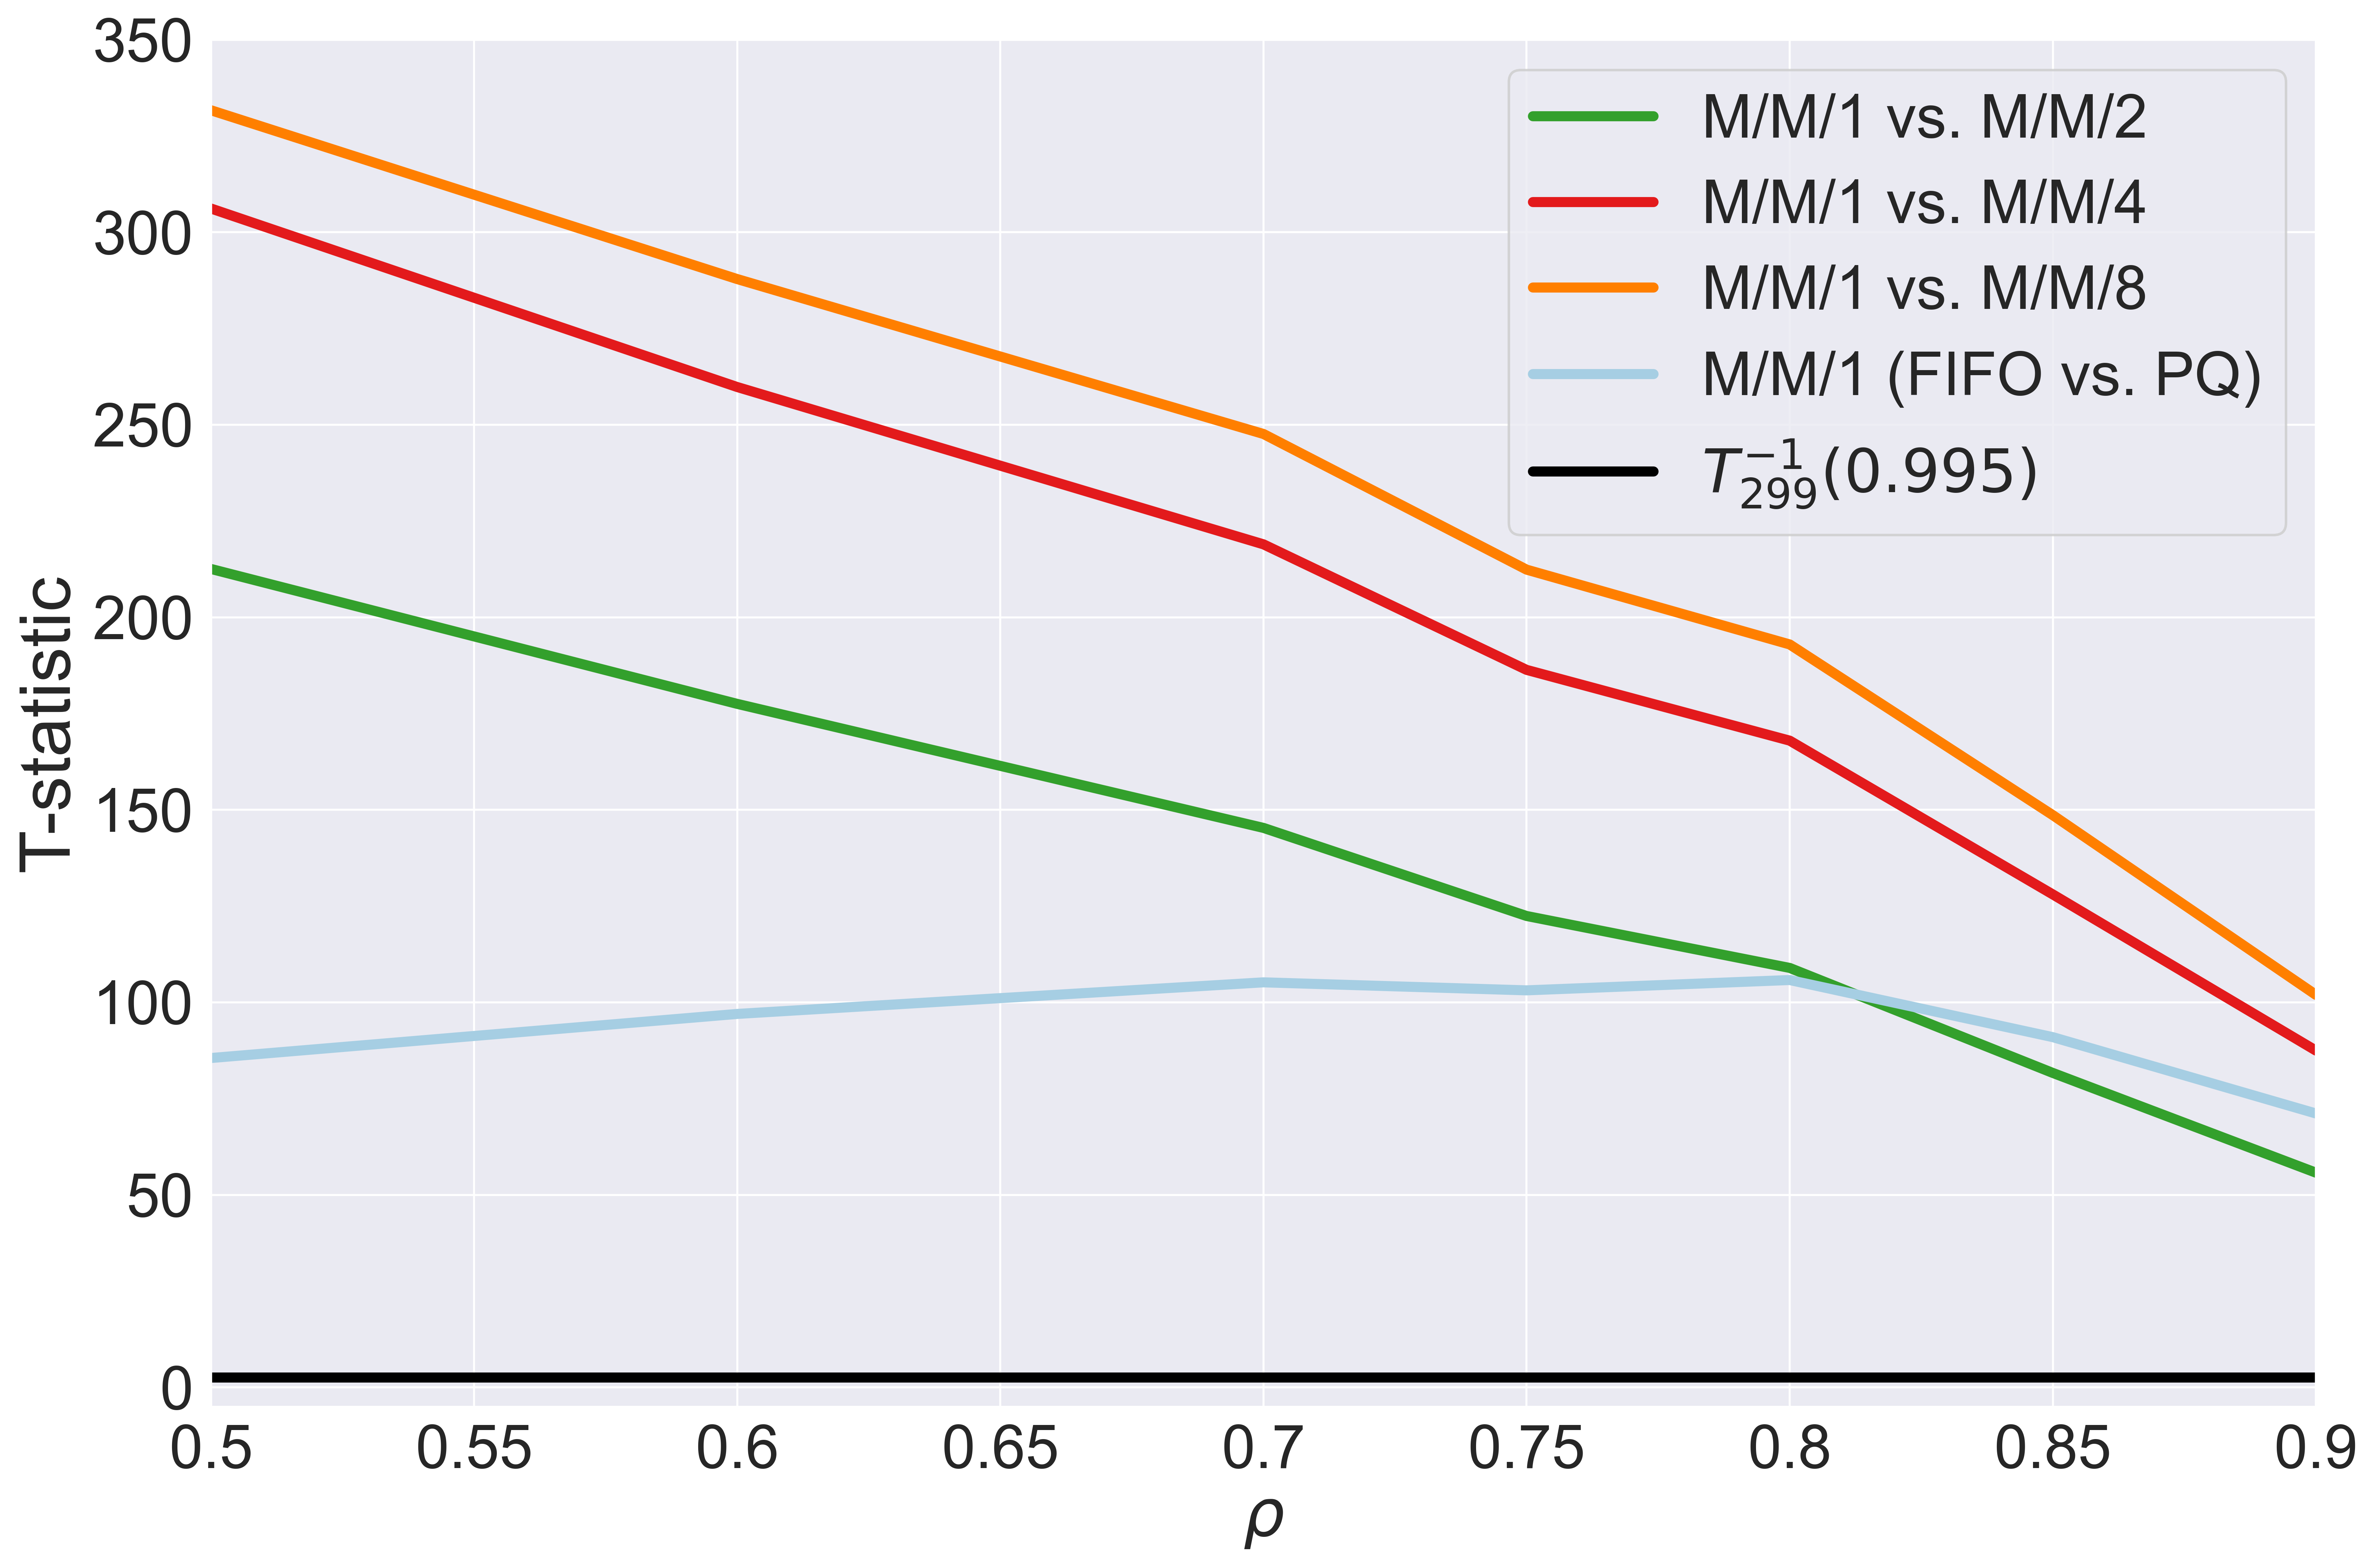

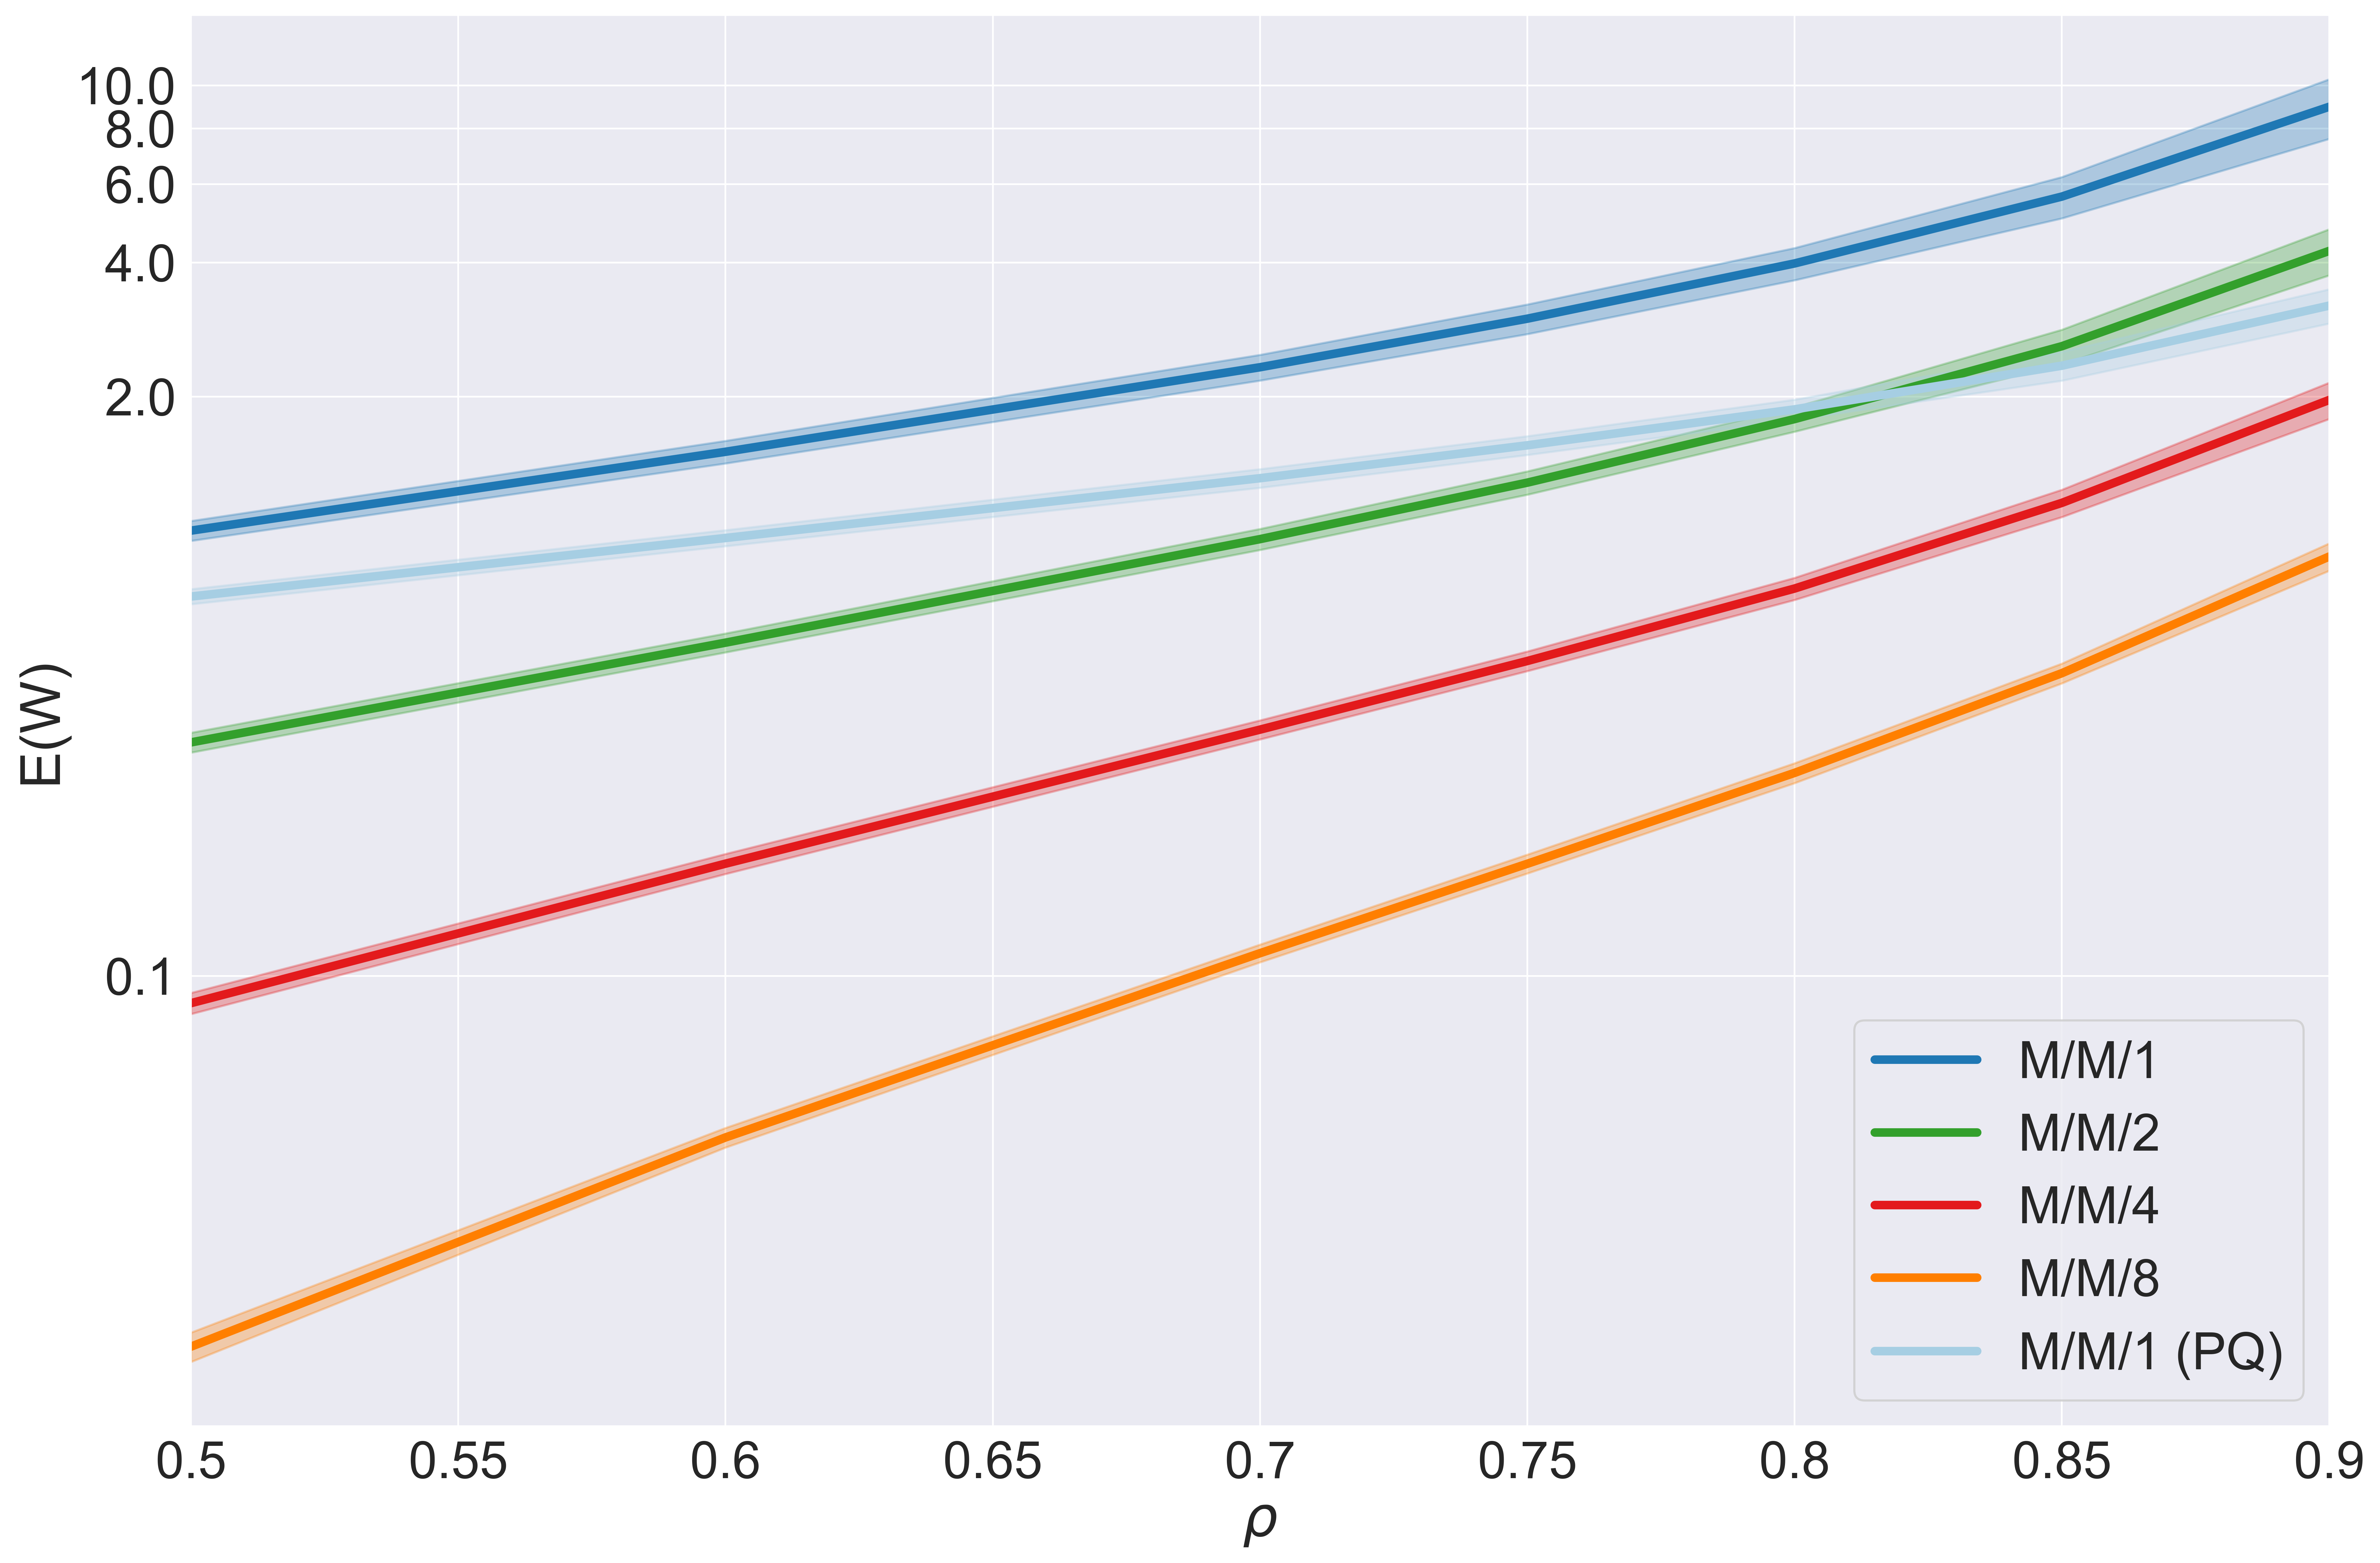

In [3]:
sns.set_style("darkgrid")
plt.rcParams['xtick.labelsize']= 24
plt.rcParams['ytick.labelsize']= 24
rho = [0.5,0.6,0.7,0.75,0.8,0.85,0.9]
servers = [1, 2, 4, 8,'priority']
tstats = []
means = []
stds = []
for n in servers:
    t_loop = []
    mean_loop = []
    std_loop = []
    if n == 'priority':
        for r in rho:
            t, p = stats.ttest_ind(df["('exp', 1, "+str(r)+")"],df["('priority', 1, "+str(r)+")"],equal_var=False)
            t_loop.append(t)
            mean_loop.append(np.mean(df["('priority', 1, "+str(r)+")"]))
            std_loop.append(np.std(df["('priority', 1, "+str(r)+")"]))

    else:
        for r in rho:
            t, p = stats.ttest_ind(df["('exp', 1, "+str(r)+")"],df["('exp', "+str(n)+", "+str(r)+")"],equal_var=False)
            t_loop.append(t)
            mean_loop.append(np.mean(df["('exp', "+str(n)+", "+str(r)+")"]))
            std_loop.append(np.std(df["('exp', "+str(n)+", "+str(r)+")"]))

    tstats.append(t_loop)
    means.append(mean_loop)
    stds.append(std_loop)

print('T-statistic with rho = 0.7, comparing 1 server with and without priority queue: '+str(tstats[4][2]))
print('T-statistic with rho = 0.7, comparing 1 and 2 servers: '+str(tstats[1][2]))
print('T-statistic with rho = 0.7, comparing 1 and 4 servers: '+str(tstats[2][2]))
print('T-statistic with rho = 0.7, comparing 1 and 8 servers: '+str(tstats[3][2]))


print('T-statistic with rho = 0.9, comparing 1 server with and without priority queue: '+str(tstats[4][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers: '+str(tstats[1][6]))
print('T-statistic with rho = 0.9, comparing 1 and 4 servers: '+str(tstats[2][6]))
print('T-statistic with rho = 0.9, comparing 1 and 8 servers: '+str(tstats[3][6]))


#Plot t-stats with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
axs.plot(rho,tstats[1],color=palette[3],label=r'M/M/1 vs. M/M/2',linewidth=4)
axs.plot(rho,tstats[2],color=palette[5],label=r'M/M/1 vs. M/M/4',linewidth=4)
axs.plot(rho,tstats[3],color=palette[7],label=r'M/M/1 vs. M/M/8',linewidth=4)
axs.plot(rho,tstats[4],color=palette[0],label='M/M/1 (FIFO vs. PQ)',linewidth=4)
axs.plot(rho,np.repeat(stats.t.ppf(0.995,299),len(rho)),color='k',label="$T^{-1}_{299}(0.995)$",linewidth=4)

axs.set_ylabel('T-statistic', fontsize=28)
axs.set_xlabel(r'$\rho$', fontsize=26)
axs.set_yticks(np.arange(0,360,50))
axs.set_yticklabels(np.round(np.arange(0,360,50)), fontsize=24)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=24)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-5,350))
axs.legend(fontsize=24)
plt.show()
fig.tight_layout()  
fig.savefig(path+'/Figures/servers_tstat.pdf',dpi=300)

#Plot means and std's with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
fig.tight_layout()
colorlist = [1,3,5,7,0]
serversname = [1, 2, 4,8,'Priority']
for i in range(5):
    if i == 0:
        axs.plot(rho,means[i],color=palette[colorlist[i]],label=r'M/M/1',linewidth=4)
    elif i == 4:
        axs.plot(rho,means[i],color=palette[colorlist[i]],label='M/M/1 (PQ)'
                 .format(serversname[i]),linewidth=4)
    else:
        axs.plot(rho,means[i],color=palette[colorlist[i]],label=r'M/M/{}'.format(serversname[i]),linewidth=4)
    errors_pos = [sum(a) for a in zip(*[means[i],2*stds[i]])]
    errors_neg = [sum(a) for a in zip(*[means[i],[-x for x in 2*stds[i]]])]
    axs.fill_between(rho, errors_pos, errors_neg,color=palette[colorlist[i]], alpha=0.3)

axs.set_yscale('log')
axs.set_ylabel('E(W)', fontsize=26)
axs.set_xlabel(r'$\rho$', fontsize=26)
axs.set_yticks([0.1, 2, 4, 6, 8, 10])
axs.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=24)
axs.set_xlim((0.5,0.9))
axs.legend(loc='lower right',fontsize=24)
plt.show()
fig.tight_layout()  
fig.savefig(path+'/Figures/servers_meanstd.pdf',dpi=300)



##### Normality tests
Change list called rho to explore other values.

In [4]:
rho = [0.7,0.9]
for r in rho:
    test, p = stats.normaltest(df["('exp', 1, "+str(r)+")"])
    print('Normality test for M/M/1 and rho = {} is equal to {} (p-value)'.format(r,p))
    test, p = stats.normaltest(df["('exp', 2, "+str(r)+")"])
    print('Normality test for M/M/2 and rho = {} is equal to {} (p-value)'.format(r,p))
    test, p = stats.normaltest(df["('exp', 4, "+str(r)+")"])
    print('Normality test for M/M/4 and rho = {} is equal to {} (p-value)'.format(r,p))
    test, p = stats.normaltest(df["('exp', 8, "+str(r)+")"])
    print('Normality test for M/M/8 and rho = {} is equal to {} (p-value)'.format(r,p))
    test, p = stats.normaltest(df["('priority', 1, "+str(r)+")"])
    print('Normality test for M/M/1 (PQ) and rho = {} is equal to {} (p-value)'.format(r,p))

Normality test for M/M/1 and rho = 0.7 is equal to 0.19815675487434894 (p-value)
Normality test for M/M/2 and rho = 0.7 is equal to 0.013627669207861315 (p-value)
Normality test for M/M/4 and rho = 0.7 is equal to 0.10791709471943206 (p-value)
Normality test for M/M/8 and rho = 0.7 is equal to 0.9871206552017552 (p-value)
Normality test for M/M/1 (PQ) and rho = 0.7 is equal to 0.22549900702405876 (p-value)
Normality test for M/M/1 and rho = 0.9 is equal to 7.458707522574349e-13 (p-value)
Normality test for M/M/2 and rho = 0.9 is equal to 8.462854751173544e-05 (p-value)
Normality test for M/M/4 and rho = 0.9 is equal to 0.0702087570977942 (p-value)
Normality test for M/M/8 and rho = 0.9 is equal to 8.707472802255575e-05 (p-value)
Normality test for M/M/1 (PQ) and rho = 0.9 is equal to 0.0008688728017276589 (p-value)


#### 3. Explore other distributions, n in [1,2] and with varying $\lambda$ 

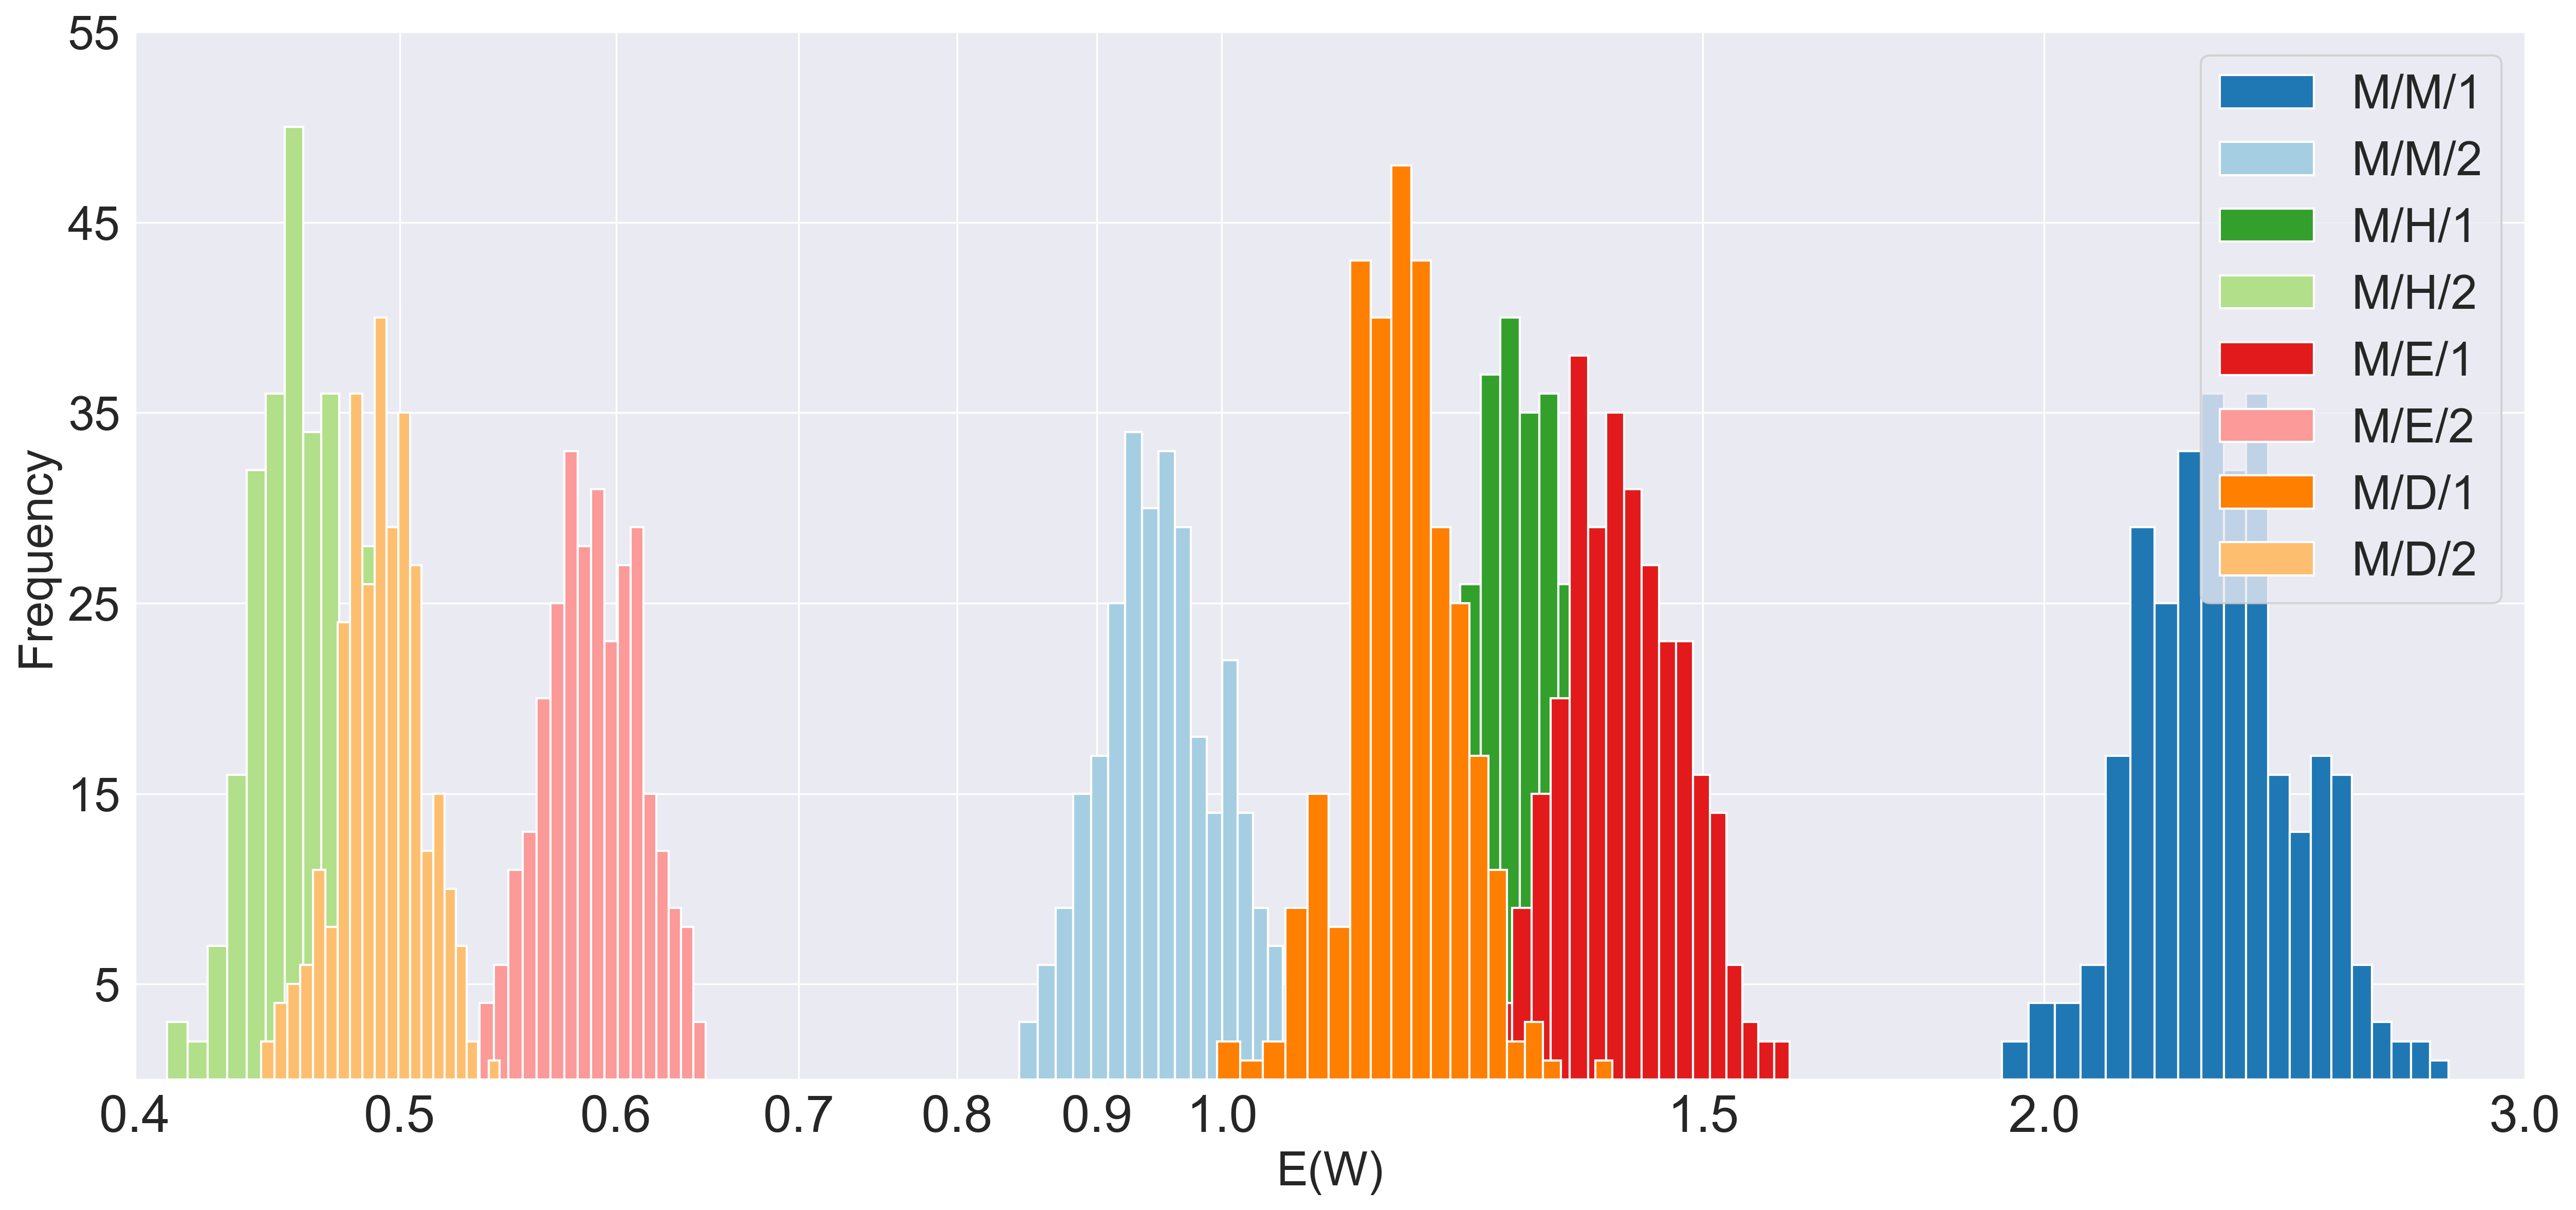

In [5]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(1, figsize=(20,9),dpi=300)

#Plot histograms
axs.hist(df["('exp', 1, 0.7)"],bins=20,color=palette[1],label='M/M/1')
axs.hist(df["('exp', 2, 0.7)"],bins=20,color=palette[0],label='M/M/2')
axs.hist(df["('hyperexp', 1, 0.7)"],bins=20,color=palette[3],label='M/H/1')
axs.hist(df["('hyperexp', 2, 0.7)"],bins=20,color=palette[2],label='M/H/2')
axs.hist(df["('erlang', 1, 0.7)"],bins=20,color=palette[5],label='M/E/1')
axs.hist(df["('erlang', 2, 0.7)"],bins=20,color=palette[4],label='M/E/2')
axs.hist(df["('deterministic', 1, 0.7)"],bins=20,color=palette[7],label='M/D/1')
axs.hist(df["('deterministic', 2, 0.7)"],bins=20,color=palette[6],label='M/D/2')

#Edit axis and labels etc.
axs.set_xscale('log')
axs.set_xlabel('E(W)', fontsize=22)
axs.set_ylabel('Frequency', fontsize=22)
axs.set_yticks(np.arange(5,60,10))
axs.set_yticklabels(np.round(np.arange(5,60,10)), fontsize=22)
axs.set_ylim((0,55))
axs.set_xlim((0.4,3))
axs.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 3])
axs.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

axs.legend(fontsize=22,loc='best',ncol=1)
plt.show()
fig.tight_layout()     
fig.savefig(path+'/Figures/distr_hist.pdf',dpi=300)


#### 4. Again plot t-statistic testing between 1 and 2 servers for every distribution
Also test for some similar peaks from graph above, and show mean (leave std for clarity).

Critical value to compare to (also plotted): 1.9679296690653618

T-statistic with rho = 0.7, comparing 1 and 2 servers, exponential distribution: 145.31191379369895
T-statistic with rho = 0.7, comparing 1 and 2 servers, hyperexponential distribution: 190.47551626653865
T-statistic with rho = 0.7, comparing 1 and 2 servers, erlang-3 distribution: 186.45996644118193
T-statistic with rho = 0.7, comparing 1 and 2 servers, deterministic: 203.6375299522318

We see that the peaks of hyperexponential and deterministic distributions are pretty close for both n.
Test for a difference between these distributions and still find significant difference below.

T-statistic with rho = 0.7, comparing hyperexponential and deterministic (1 server): 22.470958693446573
T-statistic with rho = 0.7, comparing hyperexponential and erlang (1 server): 21.176049662985704
T-statistic with rho = 0.7, comparing hyperexponential and deterministic (2 server): 16.971903680173764

T-statistic with rho = 0.9, comparing 1

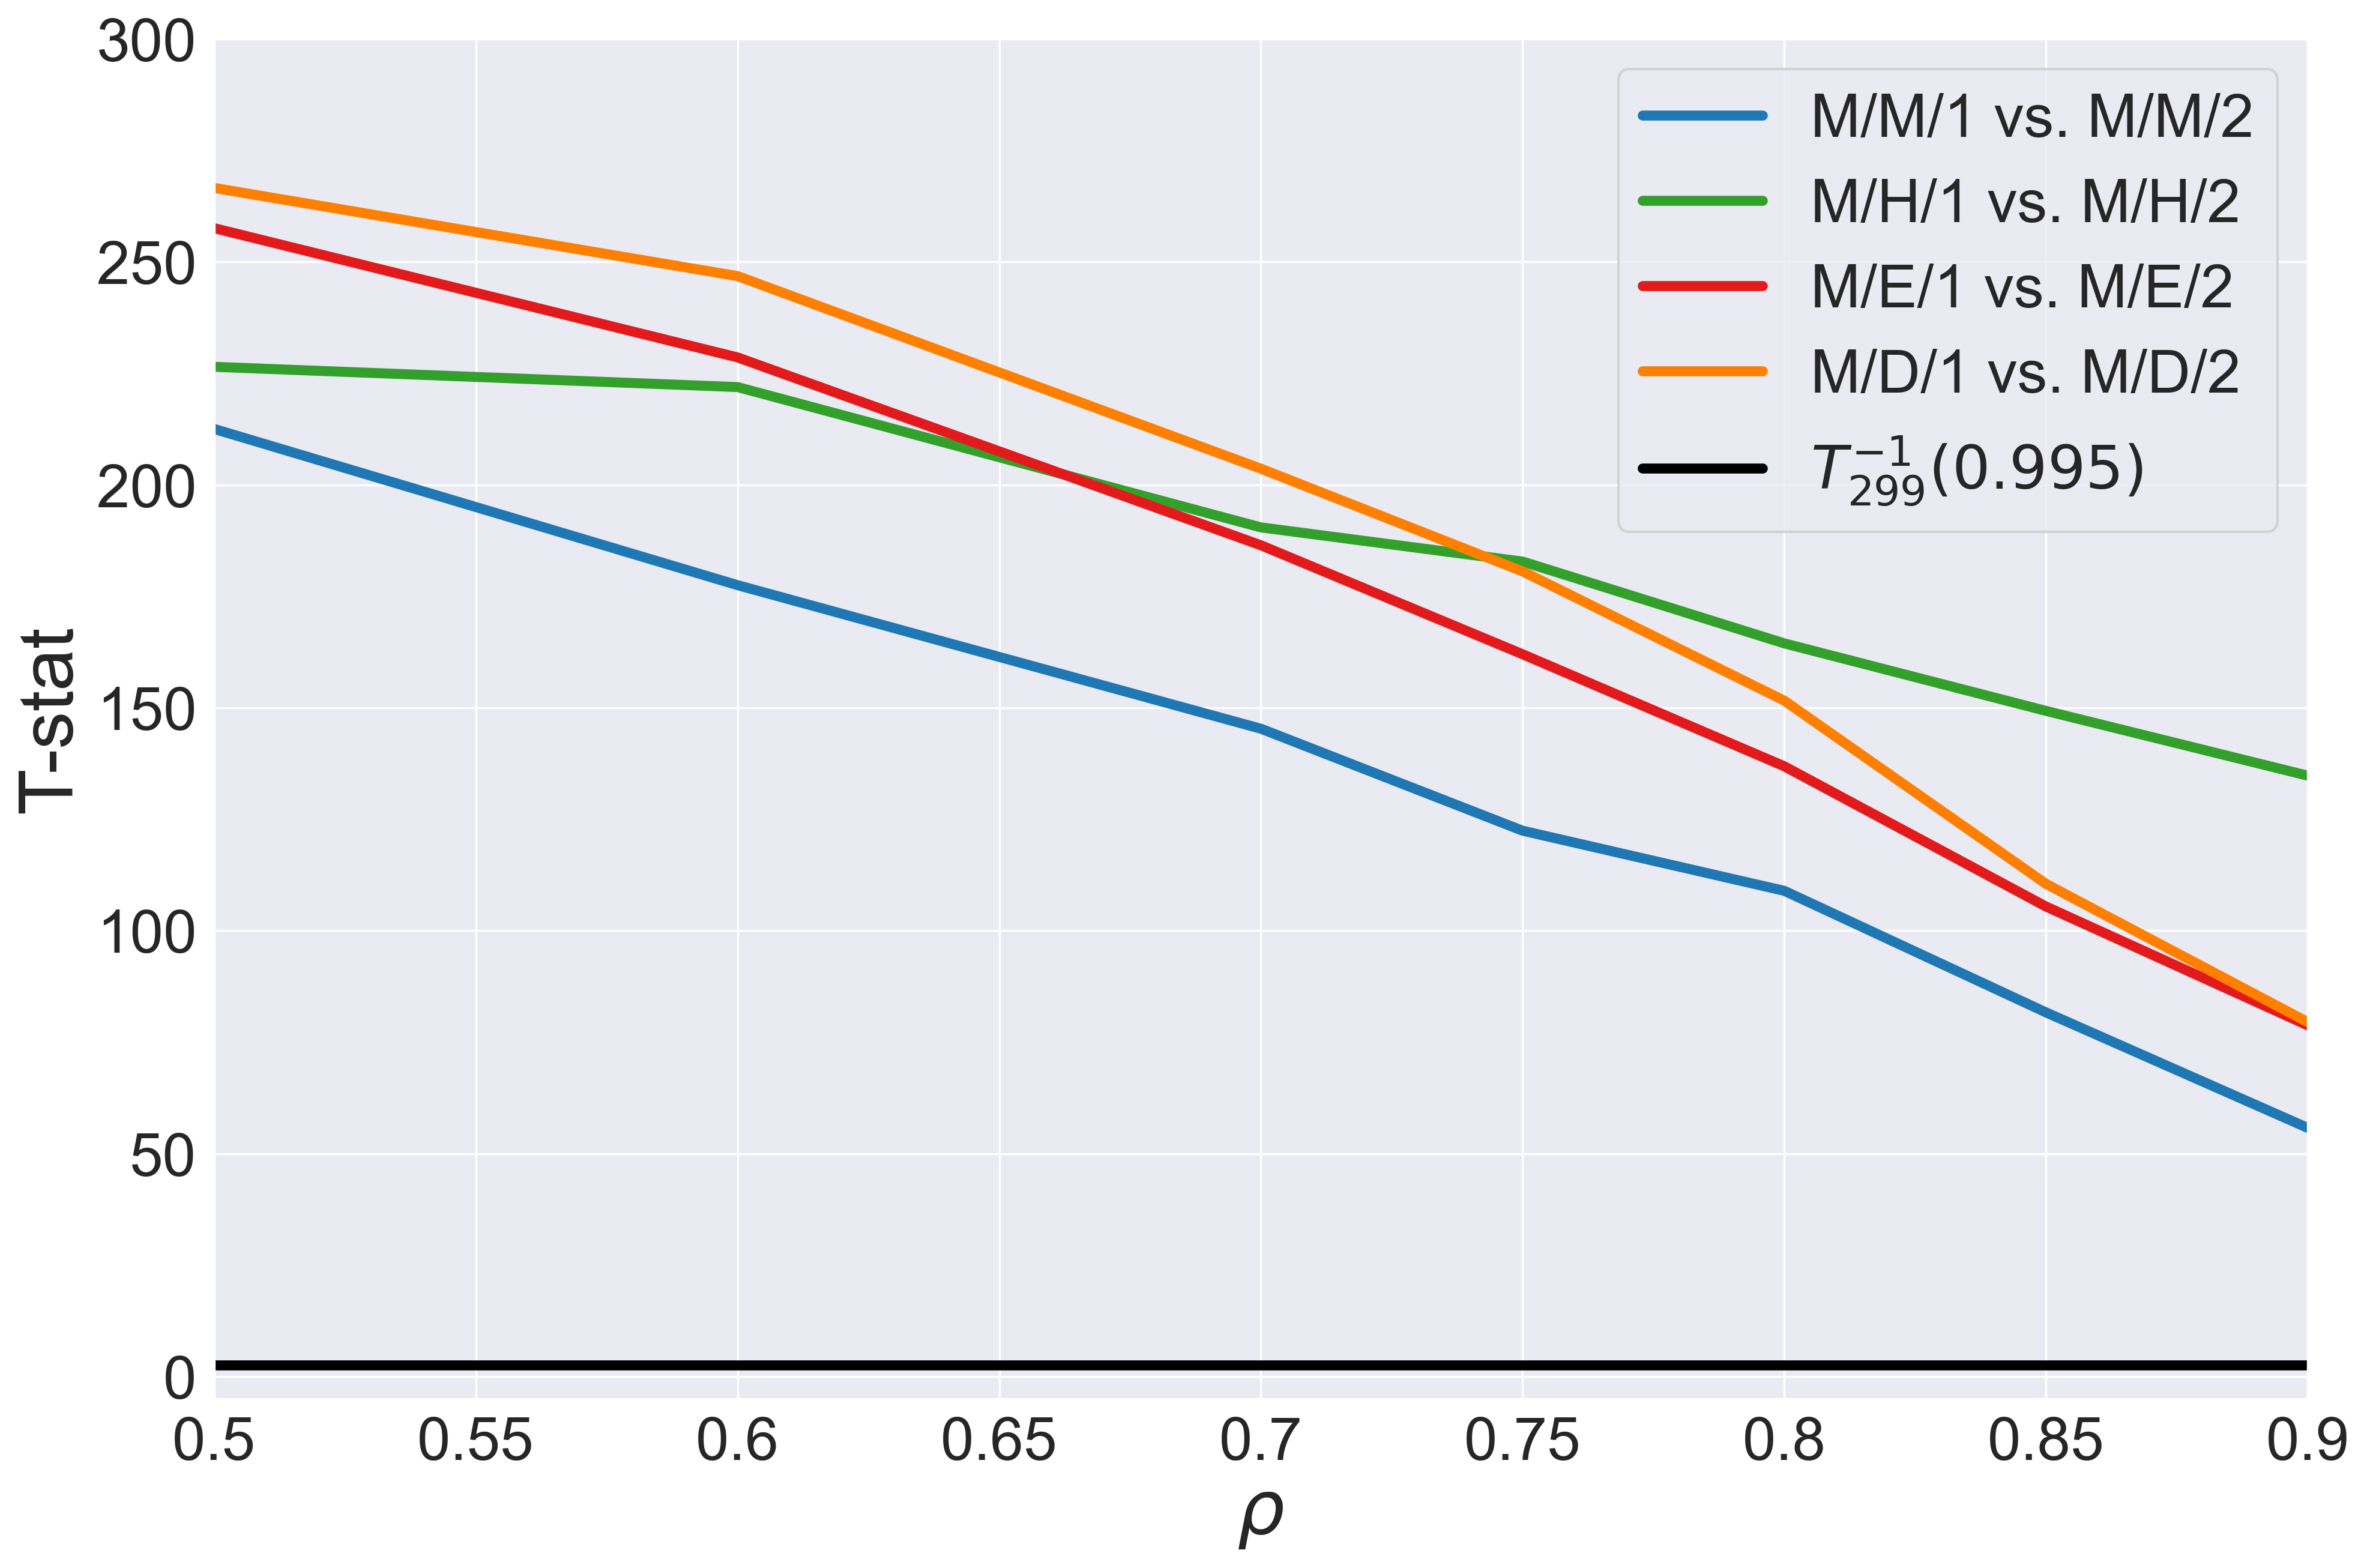

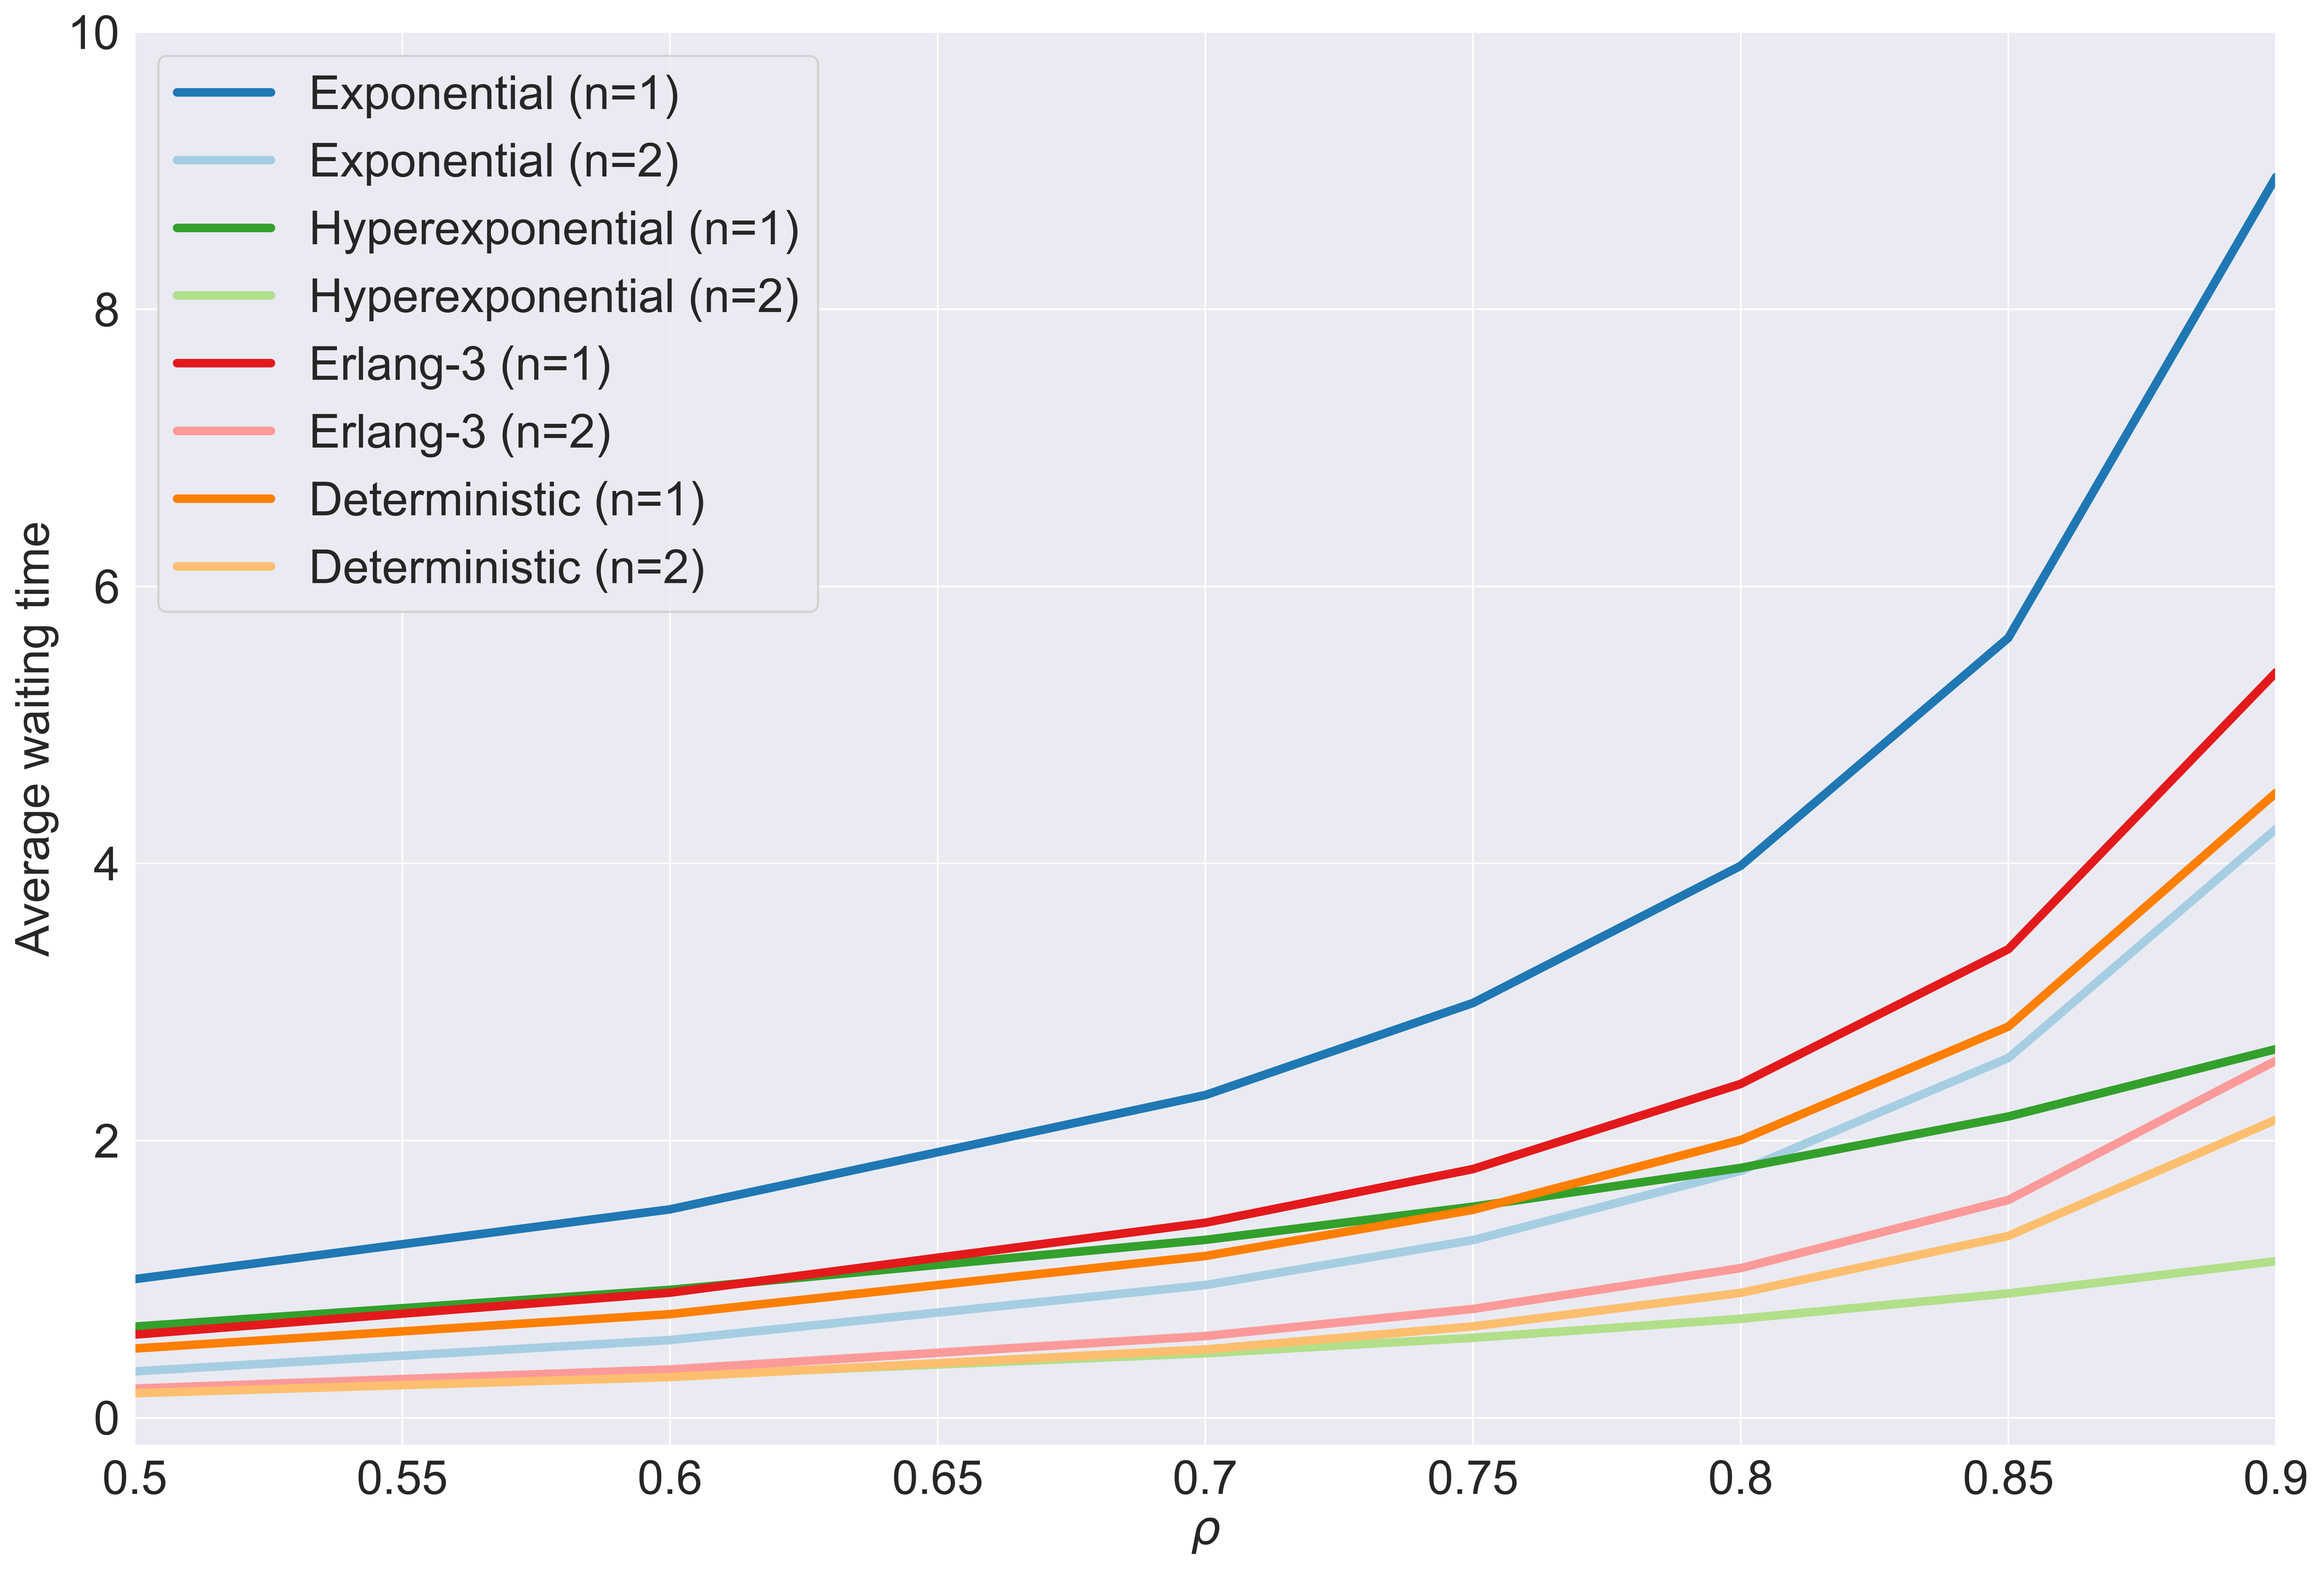

In [6]:
sns.set_style("darkgrid")
rho = [0.5,0.6,0.7,0.75,0.8,0.85,0.9]
servers = [1,2]
dist = ['exp','hyperexp','erlang','deterministic']
tstats = []
means = []
stds = []
for d in dist:
    for n in servers:
        t_loop = []
        mean_loop = []
        std_loop = []
        for r in rho:
            t, p = stats.ttest_ind(df["('"+str(d)+"', 1, "+str(r)+")"],df["('"+str(d)+"', 2, "+str(r)+")"],equal_var=False)
            t_loop.append(t)
            mean_loop.append(np.mean(df["('"+str(d)+"', "+str(n)+", "+str(r)+")"]))
            std_loop.append(np.std(df["('"+str(d)+"', "+str(n)+", "+str(r)+")"]))
        means.append(mean_loop)
        stds.append(std_loop)
    tstats.append(t_loop)
    
print('Critical value to compare to (also plotted): '+str(stats.t.ppf(0.975,299)))

print('\nT-statistic with rho = 0.7, comparing 1 and 2 servers, exponential distribution: '+str(tstats[0][2]))
print('T-statistic with rho = 0.7, comparing 1 and 2 servers, hyperexponential distribution: '+str(tstats[1][2]))
print('T-statistic with rho = 0.7, comparing 1 and 2 servers, erlang-3 distribution: '+str(tstats[2][2]))
print('T-statistic with rho = 0.7, comparing 1 and 2 servers, deterministic: '+str(tstats[3][2]))
print('\nWe see that the peaks of hyperexponential and deterministic distributions are pretty close for both n.')
print('Test for a difference between these distributions and still find significant difference below.\n')

t_extra = stats.ttest_ind(df["('hyperexp', 1, 0.7)"],df["('deterministic', 1, 0.7)"],equal_var=False)[0]
print('T-statistic with rho = 0.7, comparing hyperexponential and deterministic (1 server): '+str(t_extra))
t_extra = stats.ttest_ind(df["('erlang', 1, 0.7)"],df["('hyperexp', 1, 0.7)"],equal_var=False)[0]
print('T-statistic with rho = 0.7, comparing hyperexponential and erlang (1 server): '+str(t_extra))
t_extra = stats.ttest_ind(df["('deterministic', 2, 0.7)"],df["('hyperexp', 2, 0.7)"],equal_var=False)[0]
print('T-statistic with rho = 0.7, comparing hyperexponential and deterministic (2 server): '+str(t_extra))

print('\nT-statistic with rho = 0.9, comparing 1 and 2 servers, exponential distribution: '+str(tstats[0][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers, hyperexponential distribution: '+str(tstats[1][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers, erlang-3 distribution: '+str(tstats[2][6]))
print('T-statistic with rho = 0.9, comparing 1 and 2 servers, deterministic: '+str(tstats[3][6]))

#Plot tstats with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=300)
axs.plot(rho,tstats[0],color=palette[1],label=r'M/M/1 vs. M/M/2',linewidth=4)
axs.plot(rho,tstats[1],color=palette[3],label=r'M/H/1 vs. M/H/2',linewidth=4)
axs.plot(rho,tstats[2],color=palette[5],label=r'M/E/1 vs. M/E/2',linewidth=4)
axs.plot(rho,tstats[3],color=palette[7],label=r'M/D/1 vs. M/D/2',linewidth=4)
axs.plot(rho,np.repeat(stats.t.ppf(0.995,299),len(rho)),color='k',label="$T^{-1}_{299}(0.995)$",linewidth=4)

axs.set_ylabel(r'T-stat', fontsize=30)
axs.set_xlabel(r'$\rho$', fontsize=30)
axs.set_yticks(np.arange(0,310,50))
axs.set_yticklabels(np.round(np.arange(0,310,50)), fontsize=24)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=24)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-5,300))
axs.legend(fontsize=24)
plt.show()
fig.tight_layout()  
fig.savefig(path+'/Figures/distr_tstat.pdf',dpi=300)


#Plot means and std's with increasing rho
fig, axs = plt.subplots(1, figsize=(15,10),dpi=500)
fig.tight_layout()
distnames = ['Exponential','Hyperexponential','Erlang-3','Deterministic']

for i in range(4):
    for n in range(2):
        if n == 0:
            axs.plot(rho,means[2*i],color=palette[2*i+1],label=r'{} (n=1)'.format(distnames[i]),linewidth=4)
            errors_pos = [sum(a) for a in zip(*[means[2*i],2*stds[2*i]])]
            errors_neg = [sum(a) for a in zip(*[means[2*i],[-x for x in 2*stds[2*i]]])]
#             axs.fill_between(rho, errors_pos, errors_neg,color=palette[2*i+1], alpha=0.3)

        else:
            axs.plot(rho,means[2*i+1],color=palette[2*i],label=r'{} (n=2)'.format(distnames[i]),linewidth=4)
            errors_pos = [sum(a) for a in zip(*[means[2*i+1],2*stds[2*i+1]])]
            errors_neg = [sum(a) for a in zip(*[means[2*i+1],[-x for x in 2*stds[2*i+1]]])]
#             axs.fill_between(rho, errors_pos, errors_neg,color=palette[2*i], alpha=0.3)

axs.set_ylabel(r'Average waiting time', fontsize=22)
axs.set_xlabel(r'$\rho$', fontsize=22)
axs.set_yticks(np.arange(0,11,2))
axs.set_yticklabels(np.round(np.arange(0,11,2)), fontsize=22)
axs.set_xticklabels(np.round(np.arange(0.5,0.95,0.05),2), fontsize=22)
axs.set_xlim((0.5,0.9))
axs.set_ylim((-0.2,10))
axs.legend(fontsize=22)
plt.show()
fig.savefig(path+'/Figures/distr_meanstd.pdf',dpi=300)


##### Normality tests under 0.7

In [7]:
for d in dist:
    print(d)
    test, p = stats.normaltest(df["('"+str(d)+"', 1, 0.7)"])
    print('Normality test for c=1: {} (p-value)'.format(p))
    test, p = stats.normaltest(df["('"+str(d)+"', 2, 0.7)"])
    print('Normality test for c=2: {} (p-value)'.format(p))


exp
Normality test for c=1: 0.19815675487434894 (p-value)
Normality test for c=2: 0.013627669207861315 (p-value)
hyperexp
Normality test for c=1: 0.5376220656577715 (p-value)
Normality test for c=2: 1.1596482410720461e-06 (p-value)
erlang
Normality test for c=1: 0.2910852148796495 (p-value)
Normality test for c=2: 0.5371146334280855 (p-value)
deterministic
Normality test for c=1: 0.026232341421635334 (p-value)
Normality test for c=2: 0.7859345353433267 (p-value)


#### 5. Calculate estimations and CI's for all models under 0.7 and 0.9

In [8]:

for d in ['exp','priority']:
    if d == 'exp':
        for n in [1,2,4,8]:
            print('\n{} server'.format(n))
            mean = np.mean(df["('"+str(d)+"', "+str(n)+", 0.7)"])
            std = np.std(df["('"+str(d)+"', "+str(n)+", 0.7)"])
            CI = (round(mean-2*std,2),round(mean+2*std,2))
            print('E(W): {}{}'.format(round(mean,2),CI))    
    else:
        print('\nPriority server'.format(n))
        mean = np.mean(df["('"+str(d)+"', "+str(1)+", 0.7)"])
        std = np.std(df["('"+str(d)+"', "+str(1)+", 0.7)"])
        CI = (round(mean-2*std,2),round(mean+2*std,2))
        print('E(W): {}{}'.format(round(mean,2),CI))    
        
for n in [1,2]:
    print('\n{} server'.format(n))
    for d in dist:
        print('Distribution {}'.format(d))
        mean = np.mean(df["('"+str(d)+"', "+str(n)+", 0.7)"])
        std = np.std(df["('"+str(d)+"', "+str(n)+", 0.7)"])
        CI = (round(mean-2*std,2),round(mean+2*std,2))
        print('E(W): {}{}'.format(round(mean,2),CI))    


1 server
E(W): 2.33(2.02, 2.64)

2 server
E(W): 0.96(0.85, 1.06)

4 server
E(W): 0.36(0.32, 0.39)

8 server
E(W): 0.11(0.1, 0.12)

Priority server
E(W): 1.31(1.19, 1.44)

1 server
Distribution exp
E(W): 2.33(2.02, 2.64)
Distribution hyperexp
E(W): 1.28(1.14, 1.43)
Distribution erlang
E(W): 1.41(1.26, 1.55)
Distribution deterministic
E(W): 1.17(1.06, 1.28)

2 server
Distribution exp
E(W): 0.96(0.85, 1.06)
Distribution hyperexp
E(W): 0.47(0.42, 0.51)
Distribution erlang
E(W): 0.59(0.54, 0.64)
Distribution deterministic
E(W): 0.49(0.46, 0.53)


In [9]:

for d in ['exp','priority']:
    if d == 'exp':
        for n in [1,2,4,8]:
            print('\n{} server'.format(n))
            mean = np.mean(df["('"+str(d)+"', "+str(n)+", 0.9)"])
            std = np.std(df["('"+str(d)+"', "+str(n)+", 0.9)"])
            CI = (round(mean-2*std,2),round(mean+2*std,2))
            print('E(W): {}{}'.format(round(mean,2),CI))    
    else:
        print('\nPriority server'.format(n))
        mean = np.mean(df["('"+str(d)+"', "+str(1)+", 0.9)"])
        std = np.std(df["('"+str(d)+"', "+str(1)+", 0.9)"])
        CI = (round(mean-2*std,2),round(mean+2*std,2))
        print('E(W): {}{}'.format(round(mean,2),CI))    
        
for n in [1,2]:
    print('\n{} server'.format(n))
    for d in dist:
        print('Distribution {}'.format(d))
        mean = np.mean(df["('"+str(d)+"', "+str(n)+", 0.9)"])
        std = np.std(df["('"+str(d)+"', "+str(n)+", 0.9)"])
        CI = (round(mean-2*std,2),round(mean+2*std,2))
        print('E(W): {}{}'.format(round(mean,2),CI))    


1 server
E(W): 8.95(6.22, 11.69)

2 server
E(W): 4.25(3.24, 5.26)

4 server
E(W): 1.97(1.6, 2.33)

8 server
E(W): 0.87(0.75, 1.0)

Priority server
E(W): 3.2(2.64, 3.77)

1 server
Distribution exp
E(W): 8.95(6.22, 11.69)
Distribution hyperexp
E(W): 2.66(2.29, 3.03)
Distribution erlang
E(W): 5.38(4.24, 6.52)
Distribution deterministic
E(W): 4.51(3.54, 5.48)

2 server
Distribution exp
E(W): 4.25(3.24, 5.26)
Distribution hyperexp
E(W): 1.13(1.0, 1.26)
Distribution erlang
E(W): 2.58(2.11, 3.04)
Distribution deterministic
E(W): 2.15(1.81, 2.49)
